# Homework 06

### Paola M Hunt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In this problem, I will create a randomly generated 5x8 array and then perform some operations on the rows and columns of this array.

In [2]:
np.random.seed(1)
z = np.random.uniform(low =0, high = 10, size= (5,8))
z = np.round(z,2)
print(z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
# print the 3rd row and 6th column of Z

print('Row 3:    ', z[2,:], '\n'
     'Column 6: ', z[:,5]
     )

Row 3:     [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92] 
Column 6:  [0.92 8.78 9.68 8.78 8.35]


In [4]:
# use np.sum() to calculate the column sum and row sum for Z and the entire array

rsum = np.sum(z, axis = 1)
csum = np.sum(z, axis = 0)
asum = np.sum(z)

print(f'Row Sums:{rsum}\nColumn Sums:{csum}\nArray Sum:{asum:>10}')

Row Sums:[22.1  38.19 40.88 34.62 47.89]
Column Sums:[30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:    183.68


## Problem 2: Reshaping and Stacking Arrays

In this problem, I will use stacking and reshaping operations to create a 1000x4 array in which each column is drawn from a normal distribution with different parameters.

In [5]:
np.random.seed(167)

# create 4 arrays; each array should be a 1D array with 1000 elements drawn at random from a normal distribution

x1 = np.random.normal(loc=50, scale=10, size=1000)
x2 = np.random.normal(loc=20, scale=5, size=1000)
x3 = np.random.normal(loc=100, scale=30, size=1000)
x4 = np.random.normal(loc=10, scale=2, size=1000)

# create column arrays
x1 = x1.reshape(1000,1)
x2 = x2.reshape(1000,1)
x3 = x3.reshape(1000,1)
x4 = x4.reshape(1000,1)

# combine the column arrays into a 1000x4 array named X
X = np.hstack((x1,x2,x3,x4))
X = np.round(X,2)

print(X.shape) #verify the shape

(1000, 4)


In [6]:
# print the first six rows of the new array

print(X[:6,:])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In this problem, I used numpy operations to create a scaled version of the array created in Problem 2. In particular, I used standard scaling, where each column is rescaled to have a mean of 0 and a standard deviation of 1.

In [7]:
# calculate means of columns
cmean = np.mean(X, axis = 0)

#calculate standard deviation of columns
cstd = np.std(X, axis = 0)

print('Column means:               ', np.round(cmean,2), 
      '\nColumn standard deviations: ', np.round(cstd,2))

Column means:                [50.21 19.86 99.84 10.06] 
Column standard deviations:  [ 9.69  5.08 30.88  2.03]


I will now use the arrays calculated in the previous cell to perform the standardization.

In [8]:
W = (cmean - X) / cstd
Wcmean = np.mean(W, axis = 0)
Wcstd = np.std(W, axis = 0)

print('Column means:               ', np.round(Wcmean,2), 
      '\nColumn standard deviations: ', np.round(Wcstd,2))

Column means:                [-0.  0.  0.  0.] 
Column standard deviations:  [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

The remaining problems in this assignment will involve using pandas to work with the Auto MPG Dataset. This dataset contains information about 398 automobiles manufactured in 1983.

In [9]:
# load the contents of this file into a pandas DataFrame named auto. 
auto = pd.read_table('data/auto_mpg.txt', sep='\t')

# display the first 10 rows of this data frame
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
# Print the shape of the auto DataFrame
print(auto.shape)

(398, 5)


In [11]:
# use the mean() method of auto and print the results

auto.mean()

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64

## Problem 5: Regional Counts and Means

In this problem, I will calculate the number of observations associated with each region, as well as regional means for mpg, cyl, and wt.

In [12]:
# Use np.unique() to obtain an array of unique values appearing in the region column of auto

regions = np.unique(auto.region)
print(regions)


['asia' 'eur' 'usa']


I will now determine the number of cars manufactured in each of the three regions.

In [13]:
# Use boolean masking to create three new DataFrames

asel = auto.loc[0:,'region'] == 'asia'
asia_auto = pd.DataFrame(auto.loc[asel,:])

esel = auto.loc[0:,'region'] == 'eur'
eur_auto = pd.DataFrame(auto.loc[esel,:])

usel = auto.loc[0:,'region'] == 'usa'
usa_auto = pd.DataFrame(auto.loc[usel,:])

# determine the number of rows in each of the new DataFrames

print('Number of cars manufactured in Asia:   ', len(asia_auto),
      '\nNumber of cars manufactured in Europe: ',len(eur_auto),
      '\nNumber of cars manufactured in USA:    ',len(usa_auto)
     )


Number of cars manufactured in Asia:    79 
Number of cars manufactured in Europe:  70 
Number of cars manufactured in USA:     249


I will now determine the average mpg, weight, and number of cylinders for each region.

In [14]:
asia_means = np.array([(asia_auto.loc[:,'mpg'].mean()), 
                       (asia_auto.loc[:,'cyl'].mean()), 
                       (asia_auto.loc[:,'wt'].mean())]
                     )
eur_means = np.array([(eur_auto.loc[:,'mpg'].mean()), 
                      (eur_auto.loc[:,'cyl'].mean()), 
                      (eur_auto.loc[:,'wt'].mean())]
                    )
usa_means = np.array([(usa_auto.loc[:,'mpg'].mean()), 
                      (usa_auto.loc[:,'cyl'].mean()), 
                      (usa_auto.loc[:,'wt'].mean())]
                    )

means_df = pd.DataFrame(data = [asia_means, 
                                eur_means, 
                                usa_means
                               ],
                        index = regions,
                        columns = ['mpg', 'cyl', 'wt']
                       )
means_df.head()

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

In this problem, I will visually represent the results for MPG and weight from Problem 5 in the form of bar plots.

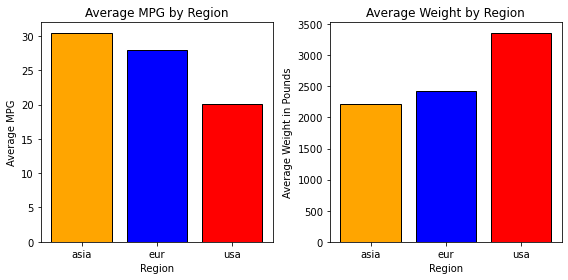

In [15]:
colors1 = ['orange', 'blue', 'red']
labels = regions

plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
plt.bar(x=labels, height=means_df['mpg'], color= colors1, edgecolor='black')
plt.title('Average MPG by Region')
plt.xlabel('Region')
plt.ylabel('Average MPG')

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=means_df['wt'], color= colors1, edgecolor='black')
plt.title('Average Weight by Region')
plt.xlabel('Region')
plt.ylabel('Average Weight in Pounds')

plt.tight_layout()
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

In this problem, I will create a scatter plot for each region displaying the relationship between MPG and weight for vehicles manufactured in each region.

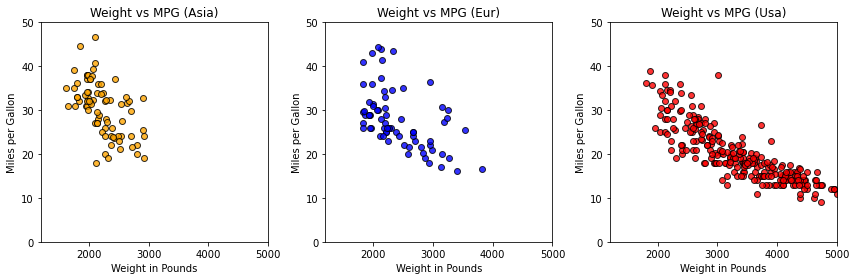

In [16]:
plt.figure(figsize=[12,4])

for i in range(0, len(regions)):

    plt.subplot(1,3,i+1)
    
    current_region = regions[i]
    wtsel = auto.wt[auto.region==current_region]
    mpgsel = auto.mpg[auto.region==current_region]
    
    
    plt.scatter(x=wtsel, y=mpgsel, alpha=0.8, color=colors1[i], edgecolor='black')
    
    plt.xlim([1200, 5000])
    plt.ylim([0, 50])
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles per Gallon')
    plt.title('Weight vs MPG (' + regions[i].title()+ ')')

plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In this problem, I will create a stacked bar chart displaying the distribution of the number of cylinders in vehicles manufactured in each region.

In [17]:
cyl_values = np.unique(auto.cyl) # create a list of unique cylinder values
print(cyl_values)

[3 4 5 6 8]


In [18]:
# create a DataFrame with one row for each value of cyl and one column for each value of region

cyl_counts_by_region = pd.crosstab(auto.cyl, auto.region)
cyl_counts_by_region = pd.DataFrame(cyl_counts_by_region)

cyl_counts_by_region.head()

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


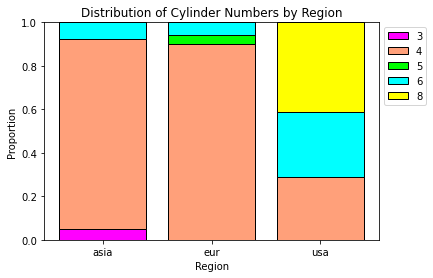

In [19]:
# convert the count information into proportions
cyl_props_by_region = pd.DataFrame(cyl_counts_by_region / np.sum(cyl_counts_by_region))

#calculate bottom of the bars for the stacked chart
bar_bottoms = (np.cumsum(cyl_props_by_region) - cyl_props_by_region)



colors2 = ['magenta', 'lightsalmon', 'lime', 'cyan', 'yellow']
labels = regions

plt.figure(figsize=[6,4])

for index in range(len(cyl_props_by_region.iloc[:])):
    height = cyl_props_by_region.iloc[index]
    plt.bar(labels, height, label=cyl_values[index], color=colors2[index], edgecolor='black', bottom = bar_bottoms.iloc[index])
    
plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.show()
    